In [1]:
# Import data and perform processing 
import os as os 

In [2]:
# import the relevent package
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the working directory

In [3]:
os.chdir('C:\\Users\\MyPC\\Desktop\\Capstone Project\\HR Analytics')

In [4]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\Capstone Project\\HR Analytics'

In [5]:
os.listdir()

['DataDictionary-HR Analytics.xlsx',
 'HR Analytics.pdf',
 'staff utlz latest 16-17_masked.xlsx',
 'staff utlz latest 17-18_masked.xlsx',
 'Terminations 15-18.xlsx']

In [6]:
import xlrd
# read the dataset
df = pd.read_excel('staff utlz latest 16-17_masked.xlsx')

df1 = pd.read_excel('staff utlz latest 17-18_masked.xlsx')

df2 = pd.read_excel('Terminations 15-18.xlsx')

In [7]:
# check the dimension of the datset
print("Dimension of the df data",df.shape)
print("Dimension of the df1 data",df1.shape)
print("Dimension of the df1 data",df2.shape)

Dimension of the df data (789, 115)
Dimension of the df1 data (973, 115)
Dimension of the df1 data (293, 9)


In [8]:
import warnings
warnings.filterwarnings('ignore')

# Concatingnating dataset

In [9]:
alldata = df.append(df1) 
 
# here we are concatinating df and df1 dataset using .append method

In [10]:
alldata = alldata.append(df2)

# here we are concatinating alldata and df2 dataset using .append method

In [11]:
alldata.head()


Employee No Profit Center      Employee Name Employee Position  \
0          1.0        PC - 1   Rochette Jilleen           Level 2   
1          2.0        PC - 2     Daryl Natalina           Level 2   
2          3.0        PC - 2  Annnora Gabrielle           Level 2   
3          4.0        PC - 3        Barbee Joey           Level 2   
4          5.0        PC - 4   Idalina Lauraine           Level 1   

  Employee Location          People Group Employee Category   Supervisor name  \
0        Location 3  Client Service Staff         Level 1/2  Idalina Lauraine   
1        Location 7  Client Service Staff         Level 1/2  Idalina Lauraine   
2        Location 7  Client Service Staff         Level 1/2  Idalina Lauraine   
3        Location 1  Client Service Staff         Level 1/2  Idalina Lauraine   
4        Location 3  Client Service Staff         Level 1/2     Abagail Druci   

   Join Date Current Status  ... NC Hours-Mar-18 Utilization%-Mar-18  \
0 2000-09-30         Active  ...             NaN                 NaN   
1 1999-05-31         Active  ...             NaN                 NaN   
2 2001-01-31         Active  ...             NaN                 NaN   
3 2000-09-30         Active  ...             NaN                 NaN   
4 1998-06-30         Active  ...             NaN                 NaN   

  Employee Number YEAR of Birth Gender Leaving Reason Previous Employer  \
0             NaN           NaN    NaN            NaN               NaN   
1             NaN           NaN    NaN            NaN               NaN   
2             NaN           NaN    NaN            NaN               NaN   
3             NaN           NaN    NaN            NaN               NaN   
4             NaN           NaN    NaN            NaN               NaN   

  Last Update Date Latest  Available Rating Emp Ref.  
0              NaT                      NaN      NaN  
1              NaT                      NaN      NaN  
2              NaT                      NaN      NaN  
3              NaT                      NaN      NaN  
4              NaT                      NaN      NaN  

[5 rows x 219 columns]

In [12]:
alldata.shape

(2055, 219)

In [13]:
# dropping the unimportant variables and also some variable having missing values 80%
new_data = alldata.drop(['Employee No','Employee Number','Join Date','Supervisor name','Previous Employer','Last Update Date','Emp Ref.','Employee Name','Latest  Available Rating','YEAR of Birth','Termination Date'], axis=1)

In [14]:
new_data.shape

(2055, 208)

# Checking datatypes

In [15]:
new_data.dtypes


Profit Center          object
Employee Position      object
Employee Location      object
People Group           object
Employee Category      object
                        ...  
BD Hours-Mar-18        object
NC Hours-Mar-18        object
Utilization%-Mar-18    object
Gender                 object
Leaving Reason         object
Length: 208, dtype: object

# Summary Statistic

Here we take a look at the summary of each attributes

In [16]:
 new_data.describe()
    

Avg Total Hours  Avg Total Available Hours  Avg Work Hours  \
count      1762.000000                1762.000000     1762.000000   
mean       1650.238365                1436.809132     1084.965897   
std         643.610294                 579.894300      640.804918   
min           0.000000                 -40.000000      -42.000000   
25%        1400.000000                1160.625000      528.000000   
50%        2080.000000                1747.750000     1209.250000   
75%        2080.000000                1852.000000     1640.500000   
max        2088.000000                2088.000000     2669.000000   

       Avg Leave Hours  Avg Training Hours  Avg BD Hours  Avg NC Hours  
count      1762.000000         1762.000000   1762.000000   1762.000000  
mean        183.500284           30.521459     69.501135    364.052202  
std         164.025275           31.246483    262.206277    388.732284  
min           0.000000          -11.000000    -24.000000    -28.500000  
25%          97.000000            6.500000      0.000000     80.000000  
50%         172.500000           22.500000      0.000000    243.000000  
75%         240.000000           44.000000      0.000000    504.000000  
max        2080.000000          169.000000   2015.000000   2458.500000

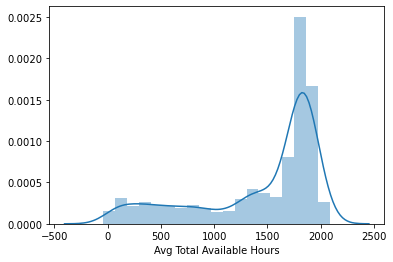

In [17]:
import seaborn as sns

sns.distplot(new_data['Avg Total Available Hours'])

plt.show()  # distribution of Avg Total Available Hours

# showing left skewed in this between 1500 and 2000 Avg Total Available Hours very high

# Missing values analysis

In [18]:
# check for missing values
missing = new_data.isnull().sum()/len(new_data)
missing

Profit Center          0.142579
Employee Position      0.142579
Employee Location      0.142579
People Group           0.142579
Employee Category      0.142579
                         ...   
BD Hours-Mar-18        0.526521
NC Hours-Mar-18        0.526521
Utilization%-Mar-18    0.526521
Gender                 0.857421
Leaving Reason         0.857421
Length: 208, dtype: float64

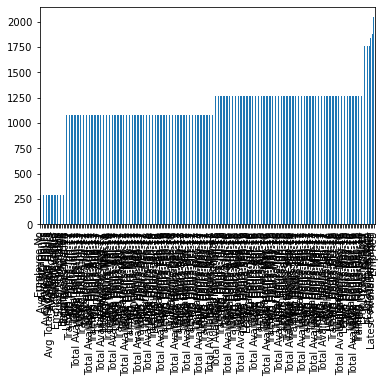

In [19]:
# check for missing values
missing = alldata.isnull().sum()
missing = missing[missing > 0]    # wherever you have missing values greater than 0 it is doing the bar plot.

# We can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()

plt.show()

# A lot of missing values are present in the datasets.

In [20]:
df1=new_data.replace(np.NaN, 0)

In [21]:
df2=df1.replace(['-'],[0])

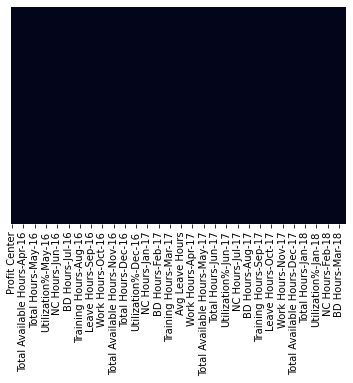

In [22]:
# using heatmap to figure out missing data if any
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False) 

In [23]:
# Again check for missing values
df2.isnull().sum()

Profit Center          0
Employee Position      0
Employee Location      0
People Group           0
Employee Category      0
                      ..
BD Hours-Mar-18        0
NC Hours-Mar-18        0
Utilization%-Mar-18    0
Gender                 0
Leaving Reason         0
Length: 208, dtype: int64

# Examine the numerical and categorical features in the dataset after missing value treatment 

In [24]:
df_numeric_features = df2.select_dtypes(include=[np.number])

df_numeric_features.columns

# here we are creating an object to have all the numeric features in it.

Index(['Total Hours-Apr-16', 'Total Available Hours-Apr-16',
       'Work Hours-Apr-16', 'Leave Hours-Apr-16', 'Training Hours-Apr-16',
       'BD Hours-Apr-16', 'NC Hours-Apr-16', 'Utilization%-Apr-16',
       'Total Hours-May-16', 'Total Available Hours-May-16',
       ...
       'NC Hours-Feb-18', 'Utilization%-Feb-18', 'Total Hours-Mar-18',
       'Total Available Hours-Mar-18', 'Work Hours-Mar-18',
       'Leave Hours-Mar-18', 'Training Hours-Mar-18', 'BD Hours-Mar-18',
       'NC Hours-Mar-18', 'Utilization%-Mar-18'],
      dtype='object', length=200)

In [25]:
df_categorical_features = df2.select_dtypes(include=[np.object])

df_categorical_features.columns

# In this object have all the categorical features.

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Current Status', 'Gender',
       'Leaving Reason'],
      dtype='object')

In [26]:
df_numeric_features.shape

(2055, 200)

In [27]:
df_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 292
Columns: 200 entries, Total Hours-Apr-16 to Utilization%-Mar-18
dtypes: float64(149), int64(51)
memory usage: 3.2 MB


In [28]:
df_numeric_features.head()

Total Hours-Apr-16  Total Available Hours-Apr-16  Work Hours-Apr-16  \
0                 168                         160.0               55.0   
1                 168                         152.0               54.0   
2                 168                         144.0               59.0   
3                 168                         152.0               17.0   
4                 168                         168.0                4.0   

   Leave Hours-Apr-16  Training Hours-Apr-16  BD Hours-Apr-16  \
0                   8                    0.0            102.0   
1                   8                    8.0             44.0   
2                  16                    8.0             43.0   
3                  16                    0.0            127.0   
4                   0                    0.0            117.0   

   NC Hours-Apr-16  Utilization%-Apr-16  Total Hours-May-16  \
0              0.0             0.343750                 176   
1             74.0             0.355263                 176   
2             60.0             0.409722                 176   
3              8.0             0.111842                 176   
4             98.0             0.023810                 176   

   Total Available Hours-May-16  ...  NC Hours-Feb-18  Utilization%-Feb-18  \
0                         168.0  ...              0.0                  0.0   
1                         152.0  ...              0.0                  0.0   
2                         184.0  ...              0.0                  0.0   
3                         160.0  ...              0.0                  0.0   
4                         168.0  ...              0.0                  0.0   

   Total Hours-Mar-18  Total Available Hours-Mar-18  Work Hours-Mar-18  \
0                   0                           0.0                0.0   
1                   0                           0.0                0.0   
2                   0                           0.0                0.0   
3                   0                           0.0                0.0   
4                   0                           0.0                0.0   

   Leave Hours-Mar-18  Training Hours-Mar-18  BD Hours-Mar-18  \
0                   0                    0.0              0.0   
1                   0                    0.0              0.0   
2                   0                    0.0              0.0   
3                   0                    0.0              0.0   
4                   0                    0.0              0.0   

   NC Hours-Mar-18  Utilization%-Mar-18  
0              0.0                  0.0  
1              0.0                  0.0  
2              0.0                  0.0  
3              0.0                  0.0  
4              0.0                  0.0  

[5 rows x 200 columns]

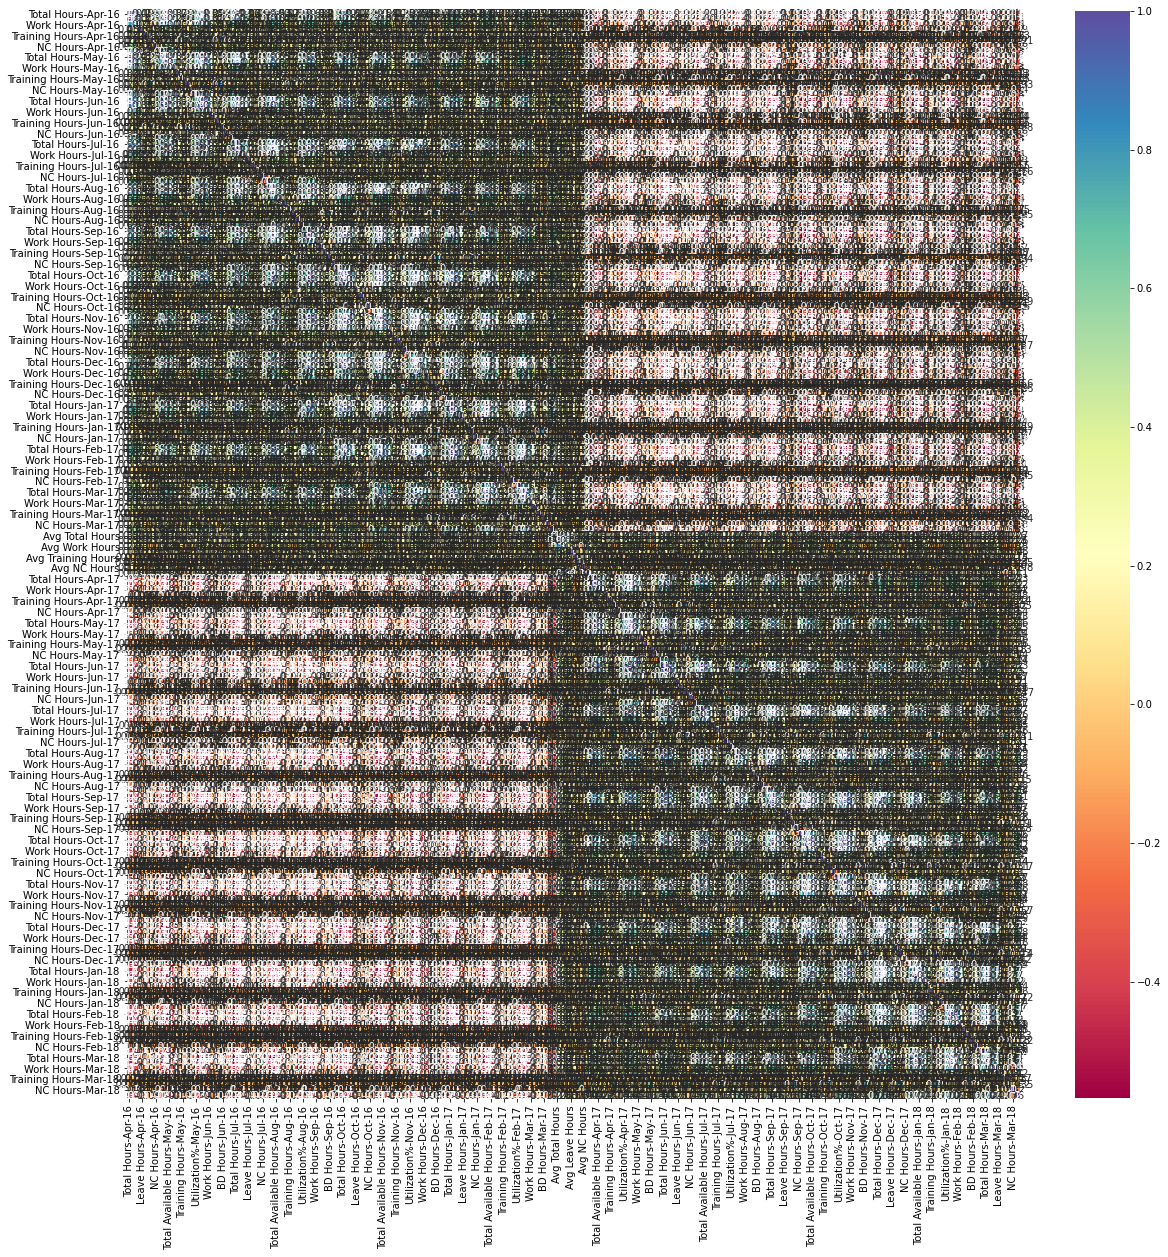

In [29]:
# calculating correlation among numeric variable
corr_matrix = df_numeric_features.corr()

# plot correlation matrix
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);

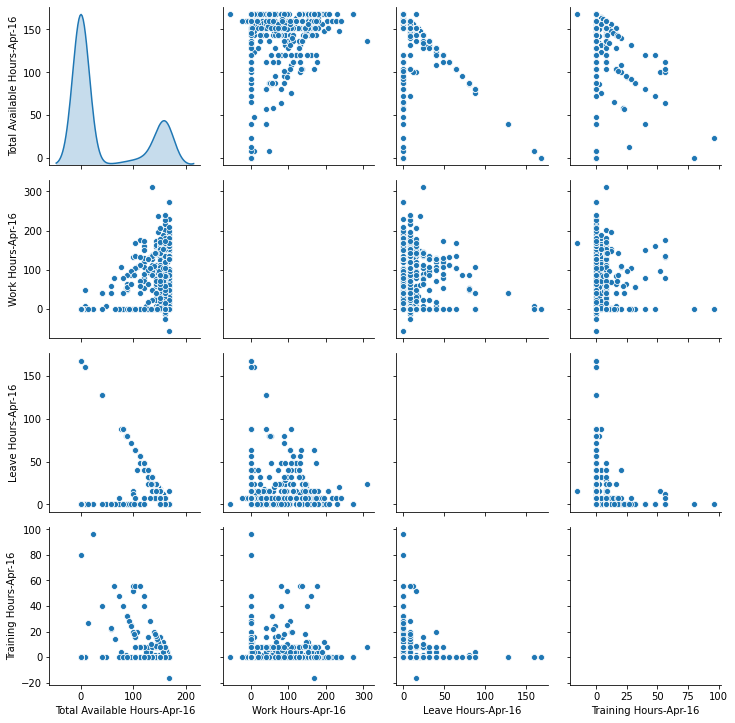

In [30]:
sns.pairplot(df_numeric_features.iloc[:,1:5],diag_kind="kde")

# This is the pairplots for 1st 5 variables and diag_kind is kde (kernel density estimates)

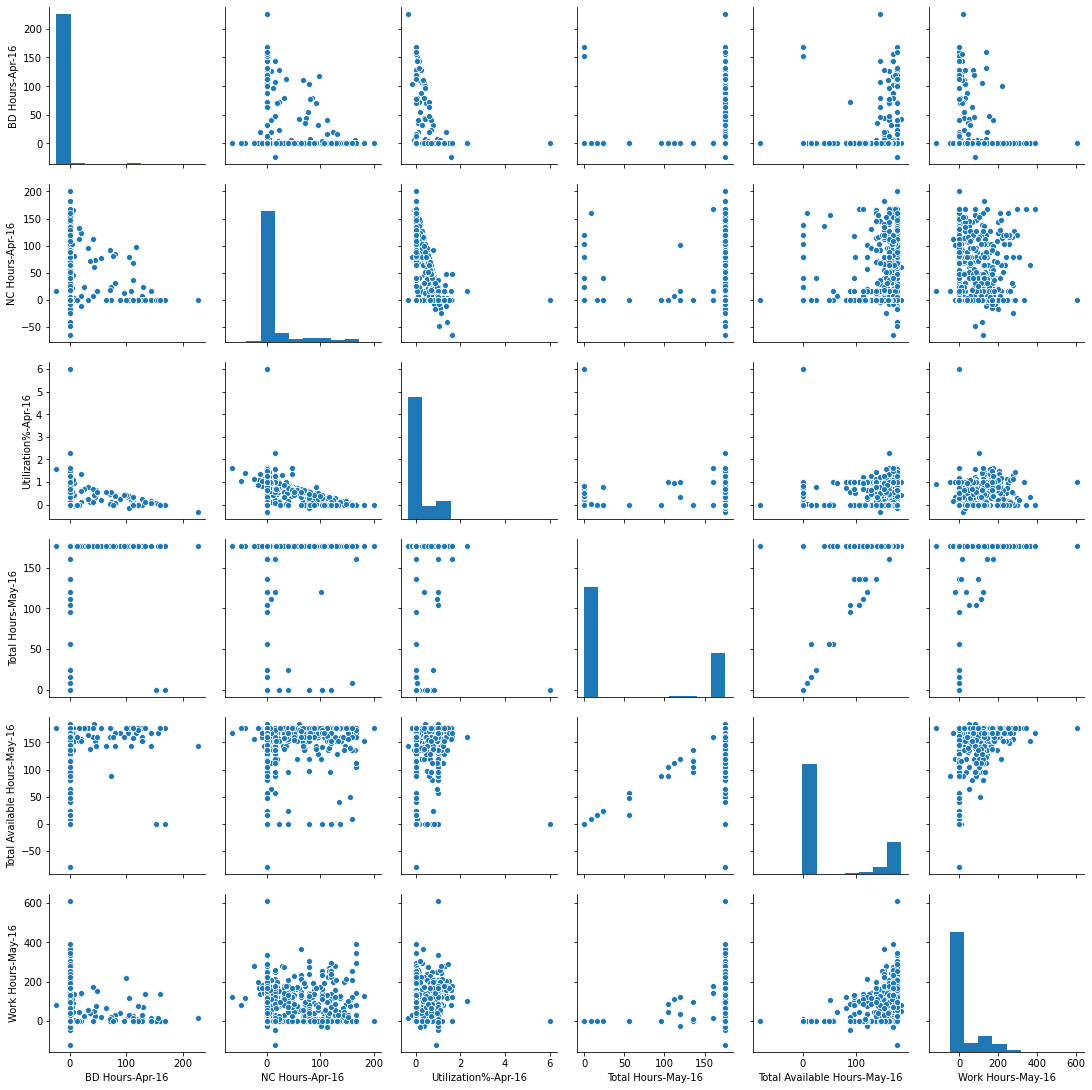

In [31]:
sns.pairplot(df_numeric_features.iloc[:,5:11],diag_kind="hist")

# all the diagnal elements have histogram.

In [32]:
df_numeric_features.columns.values

array(['Total Hours-Apr-16', 'Total Available Hours-Apr-16',
       'Work Hours-Apr-16', 'Leave Hours-Apr-16', 'Training Hours-Apr-16',
       'BD Hours-Apr-16', 'NC Hours-Apr-16', 'Utilization%-Apr-16',
       'Total Hours-May-16', 'Total Available Hours-May-16',
       'Work Hours-May-16', 'Leave Hours-May-16', 'Training Hours-May-16',
       'BD Hours-May-16', 'NC Hours-May-16', 'Utilization%-May-16',
       'Total Hours-Jun-16', 'Total Available Hours-Jun-16',
       'Work Hours-Jun-16', 'Leave Hours-Jun-16', 'Training Hours-Jun-16',
       'BD Hours-Jun-16', 'NC Hours-Jun-16', 'Utilization%-Jun-16',
       'Total Hours-Jul-16', 'Total Available Hours-Jul-16',
       'Work Hours-Jul-16', 'Leave Hours-Jul-16', 'Training Hours-Jul-16',
       'BD Hours-Jul-16', 'NC Hours-Jul-16', 'Utilization%-Jul-16',
       'Total Hours-Aug-16', 'Total Available Hours-Aug-16',
       'Work Hours-Aug-16', 'Leave Hours-Aug-16', 'Training Hours-Aug-16',
       'BD Hours-Aug-16', 'NC Hours-Aug-16', 'Ut

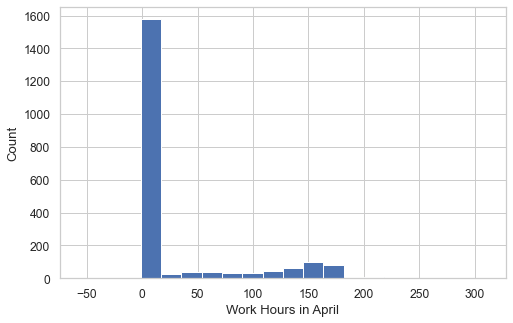

In [33]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df2['Work Hours-Apr-16'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Work Hours in April', ylabel='Count');

In [34]:
df_categorical_features.shape

(2055, 8)

In [35]:
df_categorical_features.head()

Profit Center Employee Position Employee Location          People Group  \
0        PC - 1           Level 2        Location 3  Client Service Staff   
1        PC - 2           Level 2        Location 7  Client Service Staff   
2        PC - 2           Level 2        Location 7  Client Service Staff   
3        PC - 3           Level 2        Location 1  Client Service Staff   
4        PC - 4           Level 1        Location 3  Client Service Staff   

  Employee Category Current Status Gender Leaving Reason  
0         Level 1/2         Active      0              0  
1         Level 1/2         Active      0              0  
2         Level 1/2         Active      0              0  
3         Level 1/2         Active      0              0  
4         Level 1/2         Active      0              0

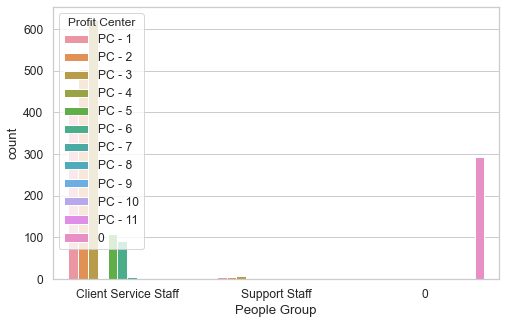

In [36]:
sns.countplot(x='People Group',hue='Profit Center',data=df2);
plt.show()

# Approximetly 650 employees have clent group and they are falls in profit center 3.
# 300 employees dont have any group.

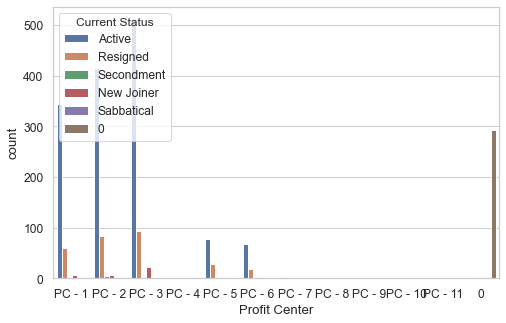

In [37]:
sns.countplot(x='Profit Center',hue='Current Status',data=df2);
plt.show()

# In case of profit center 1 and 2 active employees are very high.
# profit center 6,7,8,9 there are no employees active.

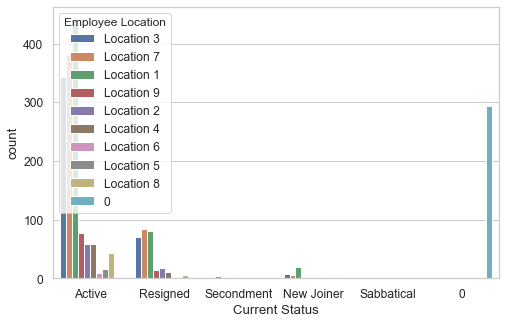

In [38]:
sns.countplot(x='Current Status',hue='Employee Location',data=df2);
plt.show()

# Location 3,7 and 1 almost 400 employees are active and 100 employees resigned.

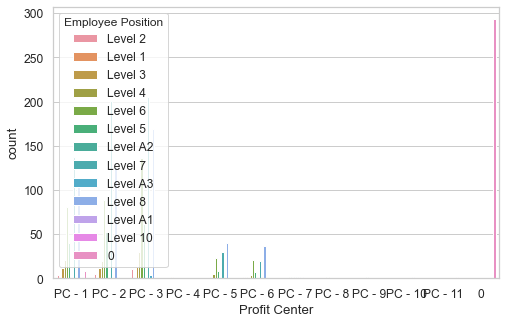

In [39]:
sns.countplot(x='Profit Center',hue='Employee Position',data=df2);
plt.show()

# large no. of employees which do not have any position.
# profit center 1 there are 200 employees which falls in level 8 and 90 employees which falls in level 5


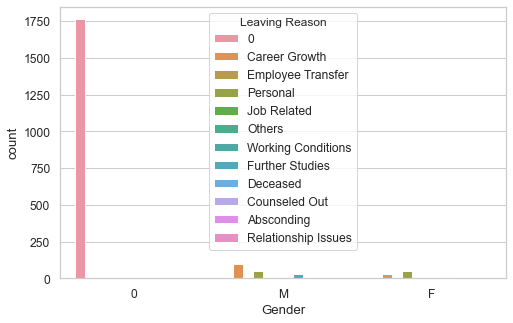

In [40]:
sns.countplot(x='Gender',hue='Leaving Reason',data=df2);
plt.show()

# There are 1750 employees which dont give leaving reason.
# 100 males leaving company because of career growth. And approximetly 50 females giving job related reasons.

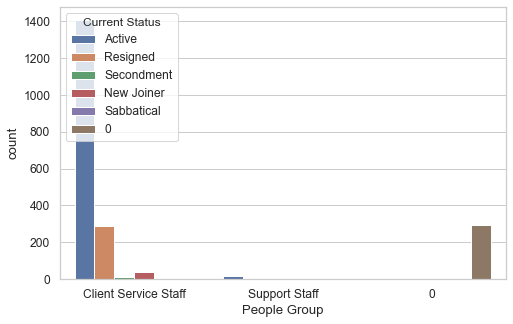

In [41]:
sns.countplot(x='People Group',hue='Current Status',data=df2);
plt.show()

# In Client group 1400 employees are active and 240 employees resigned.
# In Service Staff 30 employees are New Joiner
# There are approximetly 250 employees which do not follow any group.

In [42]:
df_categorical_features.columns

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Current Status', 'Gender',
       'Leaving Reason'],
      dtype='object')

In [43]:
#from IPython.display import display
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [44]:
#display(df2)

In [45]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    
    # calculation VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

# we are going to calculate variance_inflation_factor(vif) for the entire dataset which means for all the variables we are
# going to calculating the vif 

In [46]:
calc_vif(df_numeric_features) # we calculate the vif for all the numeric variables.


variables        VIF
0              Total Hours-Apr-16        inf
1    Total Available Hours-Apr-16        inf
2               Work Hours-Apr-16        inf
3              Leave Hours-Apr-16        inf
4           Training Hours-Apr-16        inf
..                            ...        ...
195            Leave Hours-Mar-18        inf
196         Training Hours-Mar-18        inf
197               BD Hours-Mar-18        inf
198               NC Hours-Mar-18        inf
199           Utilization%-Mar-18  19.097998

[200 rows x 2 columns]

In [47]:
from sklearn.preprocessing import LabelEncoder
cols = ('Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Current Status',
       'Gender', 'Leaving Reason')

# here we are applying the labelEcoder for on these categorical features. So we are just going to start the labelEncoding for 
# all the categorical features so the different levels of this categorical features are going to be assign a label so this
# we will go and carry out the creation of dummy variables for this categorical features.

In [48]:
# process columns, apply labelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder()
    label_ec.fit(list(df2[c].values))
    df2[c] = label_ec.transform(list(df2[c].values))
    
# here we are doing a for loop and we are iterating over cols object and c will take a FireplaceQu in 1st iteration so on, 
# and it will transform the label of each of this categorical variables after you execute this code.

In [49]:
df2.head()

Profit Center  Employee Position  Employee Location  People Group  \
0              1                  3                  3             1   
1              4                  3                  7             1   
2              4                  3                  7             1   
3              5                  3                  1             1   
4              6                  1                  3             1   

   Employee Category  Current Status  Total Hours-Apr-16  \
0                  7               1                 168   
1                  7               1                 168   
2                  7               1                 168   
3                  7               1                 168   
4                  7               1                 168   

   Total Available Hours-Apr-16  Work Hours-Apr-16  Leave Hours-Apr-16  ...  \
0                         160.0               55.0                   8  ...   
1                         152.0               54.0                   8  ...   
2                         144.0               59.0                  16  ...   
3                         152.0               17.0                  16  ...   
4                         168.0                4.0                   0  ...   

   Total Hours-Mar-18  Total Available Hours-Mar-18  Work Hours-Mar-18  \
0                   0                           0.0                0.0   
1                   0                           0.0                0.0   
2                   0                           0.0                0.0   
3                   0                           0.0                0.0   
4                   0                           0.0                0.0   

   Leave Hours-Mar-18  Training Hours-Mar-18  BD Hours-Mar-18  \
0                   0                    0.0              0.0   
1                   0                    0.0              0.0   
2                   0                    0.0              0.0   
3                   0                    0.0              0.0   
4                   0                    0.0              0.0   

   NC Hours-Mar-18  Utilization%-Mar-18  Gender  Leaving Reason  
0              0.0                  0.0       0               0  
1              0.0                  0.0       0               0  
2              0.0                  0.0       0               0  
3              0.0                  0.0       0               0  
4              0.0                  0.0       0               0  

[5 rows x 208 columns]

In [50]:
df2 = pd.get_dummies(df2)
print(df2.shape)

(2055, 208)


In [51]:
df2.head()

Profit Center  Employee Position  Employee Location  People Group  \
0              1                  3                  3             1   
1              4                  3                  7             1   
2              4                  3                  7             1   
3              5                  3                  1             1   
4              6                  1                  3             1   

   Employee Category  Current Status  Total Hours-Apr-16  \
0                  7               1                 168   
1                  7               1                 168   
2                  7               1                 168   
3                  7               1                 168   
4                  7               1                 168   

   Total Available Hours-Apr-16  Work Hours-Apr-16  Leave Hours-Apr-16  ...  \
0                         160.0               55.0                   8  ...   
1                         152.0               54.0                   8  ...   
2                         144.0               59.0                  16  ...   
3                         152.0               17.0                  16  ...   
4                         168.0                4.0                   0  ...   

   Total Hours-Mar-18  Total Available Hours-Mar-18  Work Hours-Mar-18  \
0                   0                           0.0                0.0   
1                   0                           0.0                0.0   
2                   0                           0.0                0.0   
3                   0                           0.0                0.0   
4                   0                           0.0                0.0   

   Leave Hours-Mar-18  Training Hours-Mar-18  BD Hours-Mar-18  \
0                   0                    0.0              0.0   
1                   0                    0.0              0.0   
2                   0                    0.0              0.0   
3                   0                    0.0              0.0   
4                   0                    0.0              0.0   

   NC Hours-Mar-18  Utilization%-Mar-18  Gender  Leaving Reason  
0              0.0                  0.0       0               0  
1              0.0                  0.0       0               0  
2              0.0                  0.0       0               0  
3              0.0                  0.0       0               0  
4              0.0                  0.0       0               0  

[5 rows x 208 columns]

In [52]:
df2.nunique()

Profit Center           12
Employee Position       13
Employee Location       10
People Group             3
Employee Category       14
                      ... 
BD Hours-Mar-18         52
NC Hours-Mar-18        131
Utilization%-Mar-18    307
Gender                   3
Leaving Reason          12
Length: 208, dtype: int64

# Spliting Target Variable

In [53]:
x = df2.iloc[:, df2.columns !='Current Status']  # all input
y = df2.iloc[:, df2.columns=='Current Status']   # target

# here we are segregating the input variables and target variables and we are putting all the input variables under the 
# predictor. And we are putting the dependent variable under the label target.

# Spliting Dataset into Train and Test

In [54]:
# Let us now split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

# here we are going to use 80 and 20 ratio. So we have 80 observation in train data and 20 obs. in the test data.
# In the output we are seeing the dimension of the input and output variable for both training and testing.

x_train (1644, 207)
x_test (411, 207)
y_train (1644, 1)
y_test (411, 1)


# Feature scaling

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) # here we are standardizing x_train and x_test

# Performing LDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

         In this case we set the n_components to 1, since we first want to check the performance of our classifier with a 
    single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear
    discriminants.

        Notice, in case of LDA, the transform method takes two parameters: the x_train and the y_train.
    However in the case of PCA, the transform method only requires one parameter i.e. x_train. This reflects the fact
    that LDA takes the output class labels into account while selecting the linear discriminants, while 
    PCA doesn't depend upon the output labels.

# Training and Making Predictions

In [57]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

        Since we want to compare the performance of LDA with one linear discriminant to the performance of PCA with 
    one principal component, we will use the same Random Forest classifier that we used to evaluate performance 
    of PCA-reduced algorithms.

# Evaluating the Performance

In [58]:
# As always, the last step is to evaluate performance of the algorithm with the help of a confusion matrix and
# find the accuracy of the prediction.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 58   0   0   0   0]
 [  0 285   0   8   0]
 [  0   2   0   5   0]
 [  0   8   0  42   0]
 [  0   0   0   3   0]]
Accuracy0.9367396593673966
